In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/content/Copy of online_retail_II.csv')
print(data.head())
print(data.info())

  Invoice StockCode                          Description  Quantity  \
0  536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1  536365     71053                  WHITE METAL LANTERN         6   
2  536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3  536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4  536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

        InvoiceDate  Price  Customer ID         Country  
0  01-12-2010 08:26   2.55      17850.0  United Kingdom  
1  01-12-2010 08:26   3.39      17850.0  United Kingdom  
2  01-12-2010 08:26   2.75      17850.0  United Kingdom  
3  01-12-2010 08:26   3.39      17850.0  United Kingdom  
4  01-12-2010 08:26   3.39      17850.0  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      541910 non-null  

In [6]:
data.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,09-12-2011 12:50,4.95,12680.0,France
541909,581587,POST,POSTAGE,1,09-12-2011 12:50,18.00,12680.0,France


In [4]:
data.isnull().sum()

,0
Invoice,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
Price,0
Customer ID,135080
Country,0


In [8]:
data.drop(['Description', 'Country', 'StockCode'], axis=1, inplace=True)
print(data)

       Invoice  Quantity       InvoiceDate  Price  Customer ID
0       536365         6  01-12-2010 08:26   2.55      17850.0
1       536365         6  01-12-2010 08:26   3.39      17850.0
2       536365         8  01-12-2010 08:26   2.75      17850.0
3       536365         6  01-12-2010 08:26   3.39      17850.0
4       536365         6  01-12-2010 08:26   3.39      17850.0
...        ...       ...               ...    ...          ...
541905  581587         6  09-12-2011 12:50   2.10      12680.0
541906  581587         4  09-12-2011 12:50   4.15      12680.0
541907  581587         4  09-12-2011 12:50   4.15      12680.0
541908  581587         3  09-12-2011 12:50   4.95      12680.0
541909  581587         1  09-12-2011 12:50  18.00      12680.0

[541910 rows x 5 columns]


In [13]:
data.dropna(subset=['Customer ID'], inplace=True)

data.reset_index(drop=True, inplace=True)

print(data.isnull().sum())


Invoice        0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
dtype: int64


In [15]:
data['TotalPrice'] = data['Quantity'] * data['Price']

In [16]:
data.head()

,Invoice,Quantity,InvoiceDate,Price,Customer ID,TotalPrice
0,536365,6,01-12-2010 08:26,2.55,17850.0,15.30
1,536365,6,01-12-2010 08:26,3.39,17850.0,20.34
2,536365,8,01-12-2010 08:26,2.75,17850.0,22.00
3,536365,6,01-12-2010 08:26,3.39,17850.0,20.34
4,536365,6,01-12-2010 08:26,3.39,17850.0,20.34


In [20]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], dayfirst=True)

In [21]:
data['InvoiceDate'].head()

,InvoiceDate
0,2010-12-01 08:26:00
1,2010-12-01 08:26:00
2,2010-12-01 08:26:00
3,2010-12-01 08:26:00
4,2010-12-01 08:26:00


In [22]:
snapshot_date = data['InvoiceDate'].max() + dt.timedelta(days=1)

In [23]:
snapshot_date

Timestamp('2011-12-10 12:50:00')

In [24]:
rfm = data.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,   # Recency
    'Invoice': 'nunique',                                      # Frequency
    'TotalPrice': 'sum'                                        # Monetary
})

In [25]:
rfm.columns = ['Recency', 'Frequency', 'Monetary']

In [27]:
rfm = rfm.reset_index()

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])


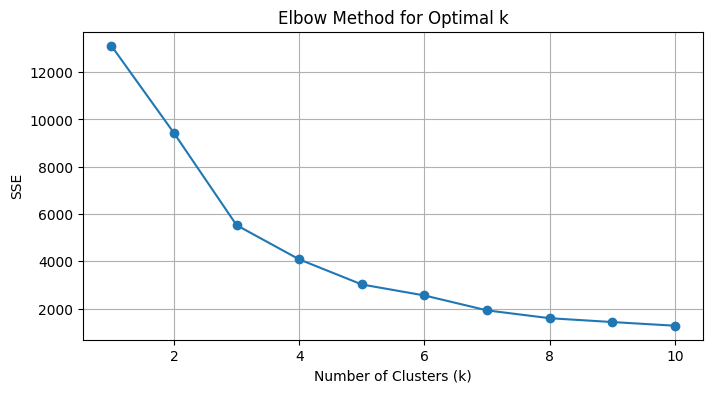

In [29]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    sse.append(kmeans.inertia_)
plt.figure(figsize=(8, 4))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE')
plt.grid(True)
plt.show()


In [30]:
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

In [31]:
rfm.groupby('Cluster').mean().round(1)

,Customer ID,Recency,Frequency,Monetary
Cluster,,,,
0,15184.9,10.8,28.5,12168.3
1,15353.2,248.9,1.8,455.1
2,15289.1,5.1,109.9,124312.3
3,15288.3,42.8,4.4,1321.0


In [32]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_components = pca.fit_transform(rfm_scaled)

In [33]:
pca_df = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = rfm['Cluster']

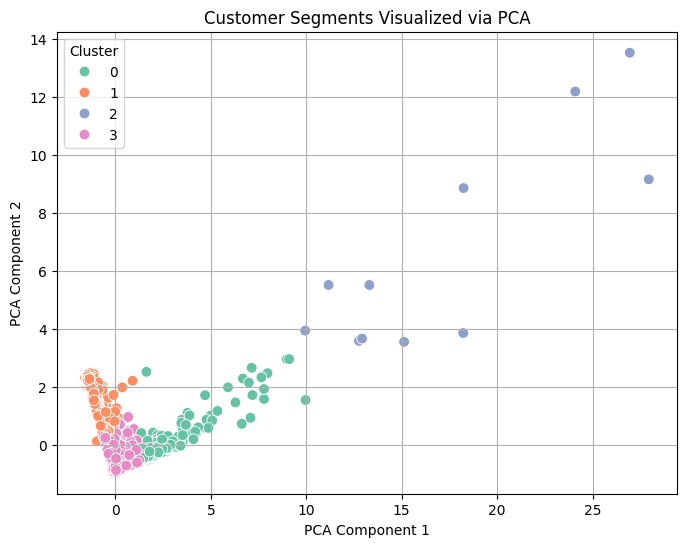

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=60)
plt.title('Customer Segments Visualized via PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()